In [ ]:
pip install pytrends pandas matplotlib seaborn statsmodels prophet scikit-learn



   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 728.2 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/13.3 MB 882.6 kB/s eta 0:00:15
   --- ------------------------------------ 1.0/13.3 MB 986.7 kB/s eta 0:00:13
   --- ------------------------------------ 1.3/13.3 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/13.3 MB 1.1 MB/s eta 0:00:11
   ----- ---------------------------------- 1.8/13.3 MB 1.1 MB/s eta 0:00:11
   ------- -------------------------------- 2.4/13.3 MB 1.3 MB/s eta 0:00:09
   ------- -------------------------------- 2.6/13.3 MB 1.3 MB/s eta 0:00:09
   --------- --------------

In [ ]:
from pytrends.request import TrendReq
import pandas as pd

pytrends = TrendReq(hl='en-US', tz=360)

keywords = ["AI", "Machine Learning", "Data Science"]

pytrends.build_payload(keywords, cat=0, timeframe='2022-01-01 2024-01-01', geo='')


geo_data = pytrends.interest_by_region()

geo_data.reset_index(inplace=True)

geo_data.head(10)



,geoName,AI,Machine Learning,Data Science
0,Afghanistan,0,0,0
1,Albania,0,0,0
2,Algeria,95,3,2
3,American Samoa,0,0,0
4,Andorra,0,0,0
5,Angola,0,0,0
6,Anguilla,0,0,0
7,Antarctica,0,0,0
8,Antigua & Barbuda,0,0,0
9,Argentina,96,2,2


In [ ]:
top_ai = geo_data.nlargest(2, "AI")[["geoName", "AI"]]
top_ml = geo_data.nlargest(2, "Machine Learning")[["geoName", "Machine Learning"]]
top_ds = geo_data.nlargest(2, "Data Science")[["geoName", "Data Science"]]

top_ai.columns = ["Country", "AI"]
top_ml.columns = ["Country", "Machine Learning"]
top_ds.columns = ["Country", "Data Science"]


df_top_countries = pd.merge(top_ai, top_ml, on="Country", how="outer")
df_top_countries = pd.merge(df_top_countries, top_ds, on="Country", how="outer")


df_top_countries

,Country,AI,Machine Learning,Data Science
0,India,NaN,11.0,11.0
1,Italy,99.0,NaN,NaN
2,Nigeria,NaN,NaN,10.0
3,Tunisia,NaN,9.0,NaN
4,Vietnam,100.0,NaN,NaN


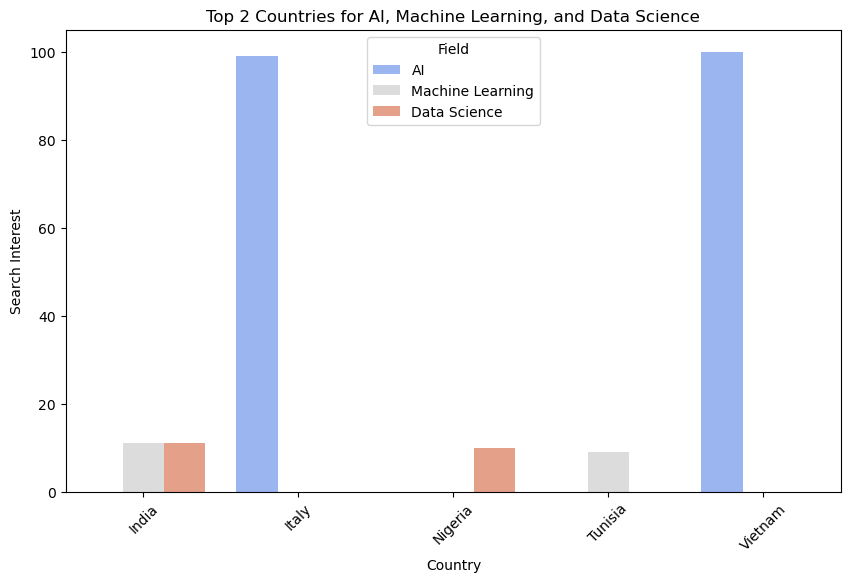

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_melted = df_top_countries.melt(id_vars=["Country"], var_name="Field", value_name="Search Interest")

plt.figure(figsize=(10, 6))
sns.barplot(x="Country", y="Search Interest", hue="Field", data=df_melted, palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Top 2 Countries for AI, Machine Learning, and Data Science")
plt.xlabel("Country")
plt.ylabel("Search Interest")
plt.legend(title="Field")
plt.show()


In [ ]:

trend_data = pytrends.interest_over_time()

trend_data = trend_data.drop(columns=['isPartial'])

trend_data.reset_index(inplace=True)

trend_data.head(10)


,date,AI,Machine Learning,Data Science
0,2021-12-26,20,1,1
1,2022-01-02,22,2,2
2,2022-01-09,20,2,2
3,2022-01-16,19,2,2
4,2022-01-23,20,2,2
5,2022-01-30,19,2,2
6,2022-02-06,20,2,2
7,2022-02-13,22,2,2
8,2022-02-20,21,2,2
9,2022-02-27,22,2,2


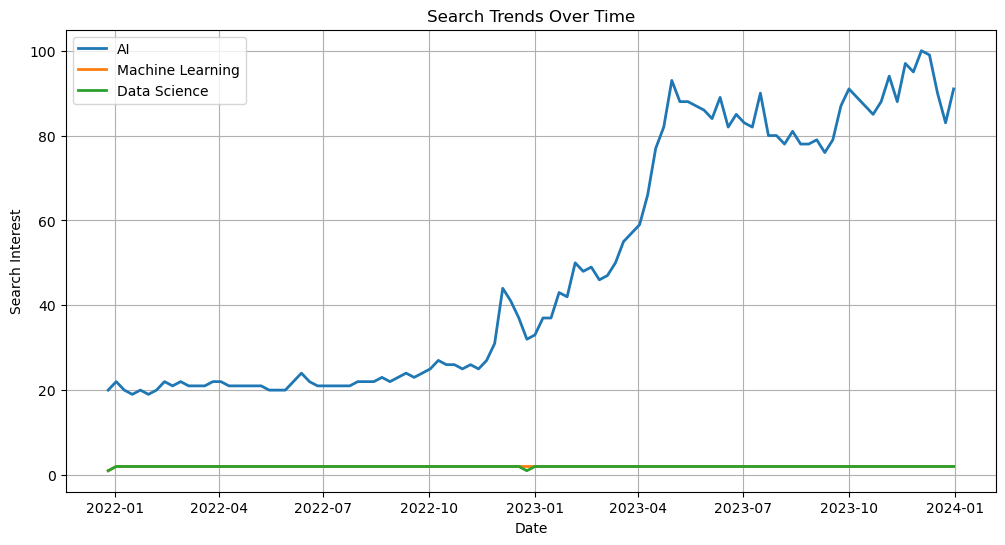

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=trend_data['date'], y=trend_data['AI'], label="AI", linewidth=2)
sns.lineplot(x=trend_data['date'], y=trend_data['Machine Learning'], label="Machine Learning", linewidth=2)
sns.lineplot(x=trend_data['date'], y=trend_data['Data Science'], label="Data Science", linewidth=2)

plt.title("Search Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.show()


02:33:36 - cmdstanpy - INFO - Chain [1] start processing
02:33:36 - cmdstanpy - INFO - Chain [1] done processing


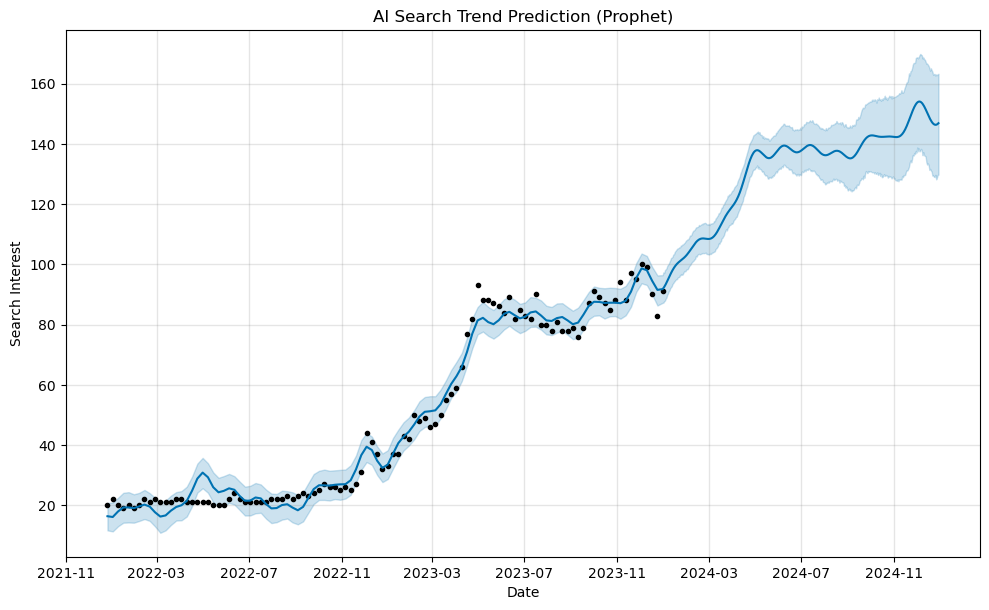

In [ ]:
from prophet import Prophet

prophet_data = trend_data[['date', 'AI']]
prophet_data.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_data)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title("AI Search Trend Prediction (Prophet)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

trend_data['date'] = pd.to_datetime(trend_data['date'])

trend_data['month'] = trend_data['date'].dt.month

monthly_trend = trend_data.drop(columns=['date']).groupby('month').mean().reset_index()

print("Columns after grouping:", monthly_trend.columns)

monthly_trend.columns = ["month", "AI", "Machine Learning", "Data Science"]
monthly_trend.head()



Columns after grouping: Index(['month', 'AI', 'Machine Learning', 'Data Science'], dtype='object')


,month,AI,Machine Learning,Data Science
0,1,29.200000,2.0,2.0
1,2,34.750000,2.0,2.0
2,3,36.750000,2.0,2.0
3,4,51.333333,2.0,2.0
4,5,50.111111,2.0,2.0


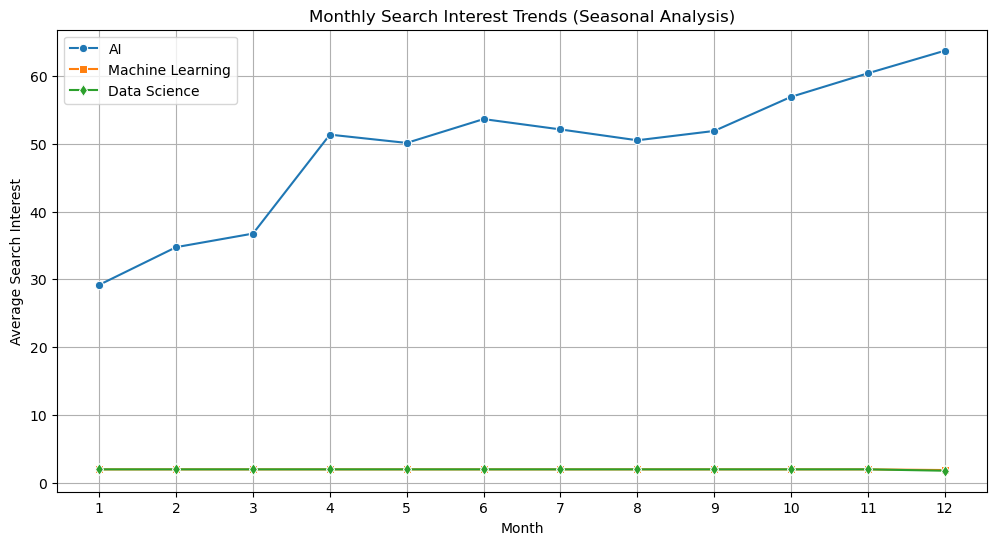

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

sns.lineplot(x=monthly_trend['month'], y=monthly_trend['AI'], label="AI", marker="o")
sns.lineplot(x=monthly_trend['month'], y=monthly_trend['Machine Learning'], label="Machine Learning", marker="s")
sns.lineplot(x=monthly_trend['month'], y=monthly_trend['Data Science'], label="Data Science", marker="d")

plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Average Search Interest")
plt.title("Monthly Search Interest Trends (Seasonal Analysis)")
plt.legend()
plt.grid(True)
plt.show()


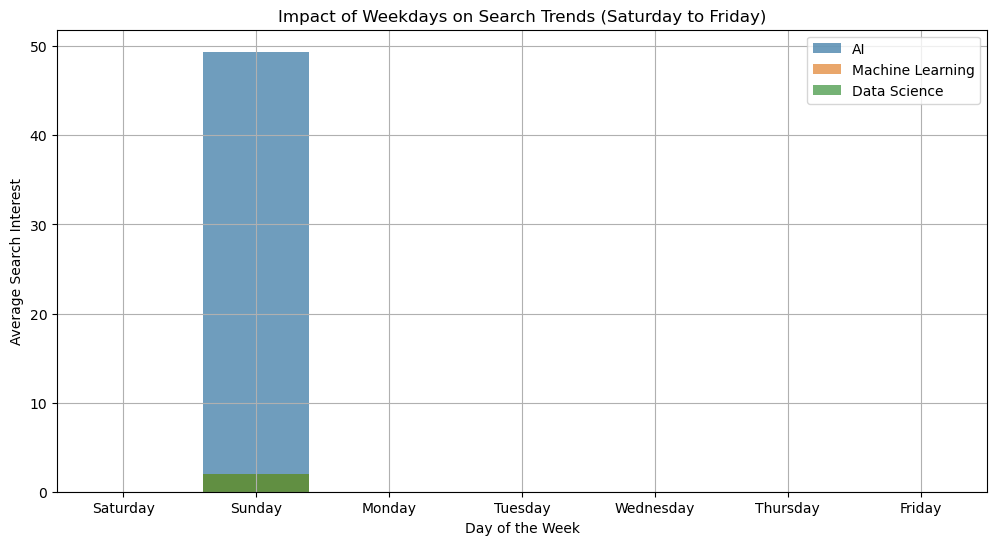

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trend_data['date'] = pd.to_datetime(trend_data['date'])
trend_data['weekday'] = trend_data['date'].dt.dayofweek
weekday_trend = trend_data.groupby('weekday').mean()

weekday_trend = weekday_trend.reindex([5, 6, 0, 1, 2, 3, 4])

weekday_trend.index = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_trend.index, y=weekday_trend['AI'], label="AI", alpha=0.7)
sns.barplot(x=weekday_trend.index, y=weekday_trend['Machine Learning'], label="Machine Learning", alpha=0.7)
sns.barplot(x=weekday_trend.index, y=weekday_trend['Data Science'], label="Data Science", alpha=0.7)

plt.xlabel("Day of the Week")
plt.ylabel("Average Search Interest")
plt.title("Impact of Weekdays on Search Trends (Saturday to Friday)")
plt.legend()
plt.grid(True)

plt.show()



In [ ]:
print(trend_data['weekday'].value_counts().sort_index())


weekday
6    53
Name: count, dtype: int64
